<a href="https://colab.research.google.com/github/XxLENZOxX/Parcial2_R.A.2/blob/main/Repropagacion_en_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

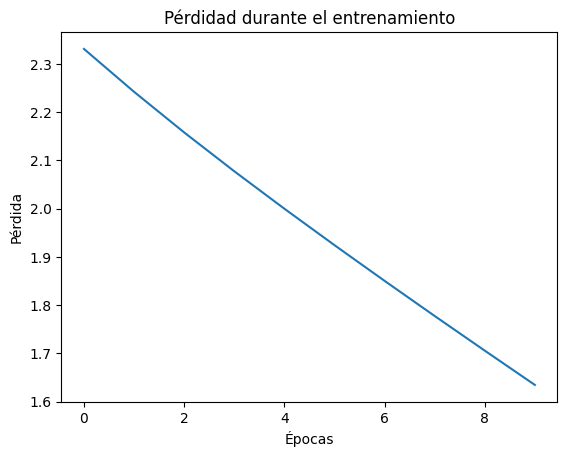

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


#definir el modelo


class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN,self).__init__()
    self.fc1=nn.Linear(784,128) #Capa oculta
    self.fc2=nn.Linear(128,10) #Capa salida


  def forward(self,x):
    x=torch.relu(self.fc1(x)) #Activación relu en la capa oculta.
    x=self.fc2(x) #Capa de salida.
    return x


model = SimpleNN()
criterion=nn.CrossEntropyLoss() #Pérdidad de entropia cruzada.
optimizer=optim.Adam(model.parameters(),lr=0.001) #Optimizador Adam.


x_train=torch.randn(1000,784) #Datos aleatorios.
y_train=torch.randint(0,10,(1000,)) #Etiquetas aleatorias.


losses=[]


for epoch in range(10):
  optimizer.zero_grad() #Inicializar los gradiantes.
  outputs=model(x_train) #Pasar los datos a través del modelo.
  loss=criterion(outputs,y_train) #Calcular la pérdida.
  losses.append(loss.item()) #Almacenar la pérdidad.
  loss.backward() #Calcular gradianes.
  optimizer.step() #Actualizar los pesos.


plt.plot(losses)
plt.title("Pérdidad durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.show()